<a href="https://colab.research.google.com/github/digdemorhan/Keras_With_Examples_For_Deep_Learning/blob/main/KerasFunctionalAPIExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Verisetinin yüklenmesi
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
#Verisetinin parçalanması
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

In [22]:
#Modelin kurulması
import tensorflow as tf
tf.random.set_seed(42)
normal = tf.keras.layers.Normalization()
normal.adapt(X_train)
hiddenlayer = tf.keras.layers.Dense(64, activation="relu")
hiddenlayer2 = tf.keras.layers.Dense(64, activation="relu")
concat = tf.keras.layers.Concatenate()
output = tf.keras.layers.Dense(wine.target_names.shape[0], activation='softmax')

In [23]:
#Sinir ağı inşası
input1 = tf.keras.layers.Input(shape=X_train.shape[1:])
normalize = normal(input1)
hidden1 = hiddenlayer(normalize)
hidden2 = hiddenlayer2(hidden1)
concat1 = concat([normalize, hidden1])
output1 = output(concat1)
model = tf.keras.Model(inputs=[input1],outputs=[output1])

In [24]:
#Modelin özeti
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 13)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 13)             │             27 │ input_layer_6[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │            896 │ normalization_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 77)             │              0 │ normalization_3[0][0], │
│ (Concatenate)             │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 3)              │            234 │ concatenate_3[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 1,130 (4.41 KB)

 Non-trainable params: 27 (112.00 B)

In [25]:
#Modelin compile edilmesi ve eğitimi
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs = 50,
    batch_size=10,
    validation_split = 0.2
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.5189 - loss: 0.9914 - val_accuracy: 0.5556 - val_loss: 0.8965
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5499 - loss: 0.9629 - val_accuracy: 0.5556 - val_loss: 0.8709
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5917 - loss: 0.9371 - val_accuracy: 0.6667 - val_loss: 0.8461
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6297 - loss: 0.9125 - val_accuracy: 0.7037 - val_loss: 0.8223
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6432 - loss: 0.8887 - val_accuracy: 0.7037 - val_loss: 0.7993
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6539 - loss: 0.8659 - val_accuracy: 0.7407 - val_loss: 0.7772
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6759 - loss: 0.8439 - val_accuracy: 0.7407 - val_loss: 0.7559
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6625 - loss: 0.8227 - val_accuracy: 0.7407 - val_los

In [26]:
#Model değerlendirimi
test = model.evaluate(X_test, y_test)
print(f"Test Loss: {test[0]}")
print(f"Test Accuracy: {test[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 0.9051 - loss: 0.3183
Test Loss: 0.3325914144515991
Test Accuracy: 0.8888888955116272


In [27]:
#Model tahmini
import numpy as np
predictions = model.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)
print("Gerçek Değerler:", y_test)
print("Tahminler:", predictions_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Gerçek Değerler: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Tahminler: [0 0 2 0 1 0 1 2 1 2 1 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 0
 2 1 1 0 1 1 2 2]


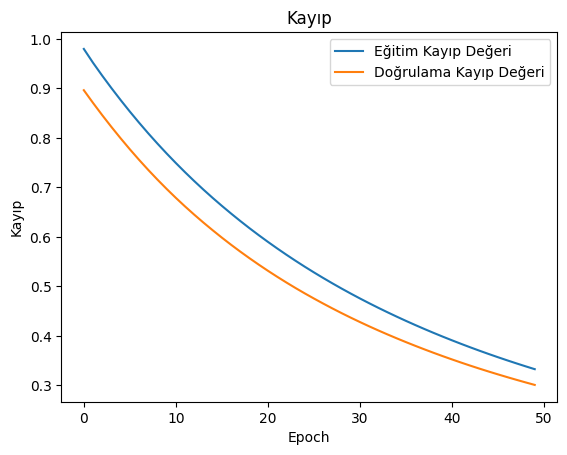

In [29]:
#Eğitim ve doğrulama kayıp değeri için veri görselleştirme
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Eğitim Kayıp Değeri")
plt.plot(history.history['val_loss'], label="Doğrulama Kayıp Değeri")
plt.title("Kayıp")
plt.xlabel("Epoch")
plt.ylabel("Kayıp")
plt.legend()
plt.show()

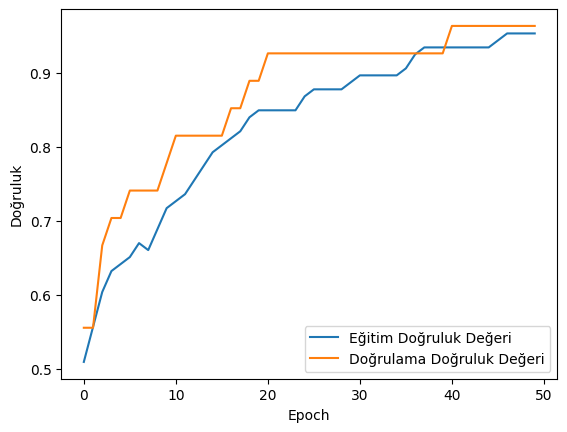

In [30]:
#Eğitim ve doğrulama doğruluğu için veri görselleştirme
plt.plot(history.history['accuracy'], label="Eğitim Doğruluk Değeri")
plt.plot(history.history['val_accuracy'], label="Doğrulama Doğruluk Değeri")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.show()

## **Farklı Input Girişleri İle Tasarım**

In [38]:
#Model tasarımı ve eğitimi
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[8])

normal_layer_wide = tf.keras.layers.Normalization()
normal_layer_deep = tf.keras.layers.Normalization()

normal_layer_wide.adapt(X_train[:, :5])
normal_layer_deep.adapt(X_train[:, 5:])

normal_wide = normal_layer_wide(input_wide)
normal_deep = normal_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(64, activation="relu")(normal_deep)
hidden2 = tf.keras.layers.Dense(64, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([normal_wide, hidden2])
output = tf.keras.layers.Dense(wine.target_names.shape[0], activation='softmax')(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep],outputs=[output])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

X_train_wide = X_train[:, :5]
X_train_deep = X_train[:, 5:]

history = model.fit(
    [X_train_wide, X_train_deep],
    y_train,
    epochs = 50,
    batch_size=10,
    validation_split = 0.2
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.3548 - loss: 1.2368 - val_accuracy: 0.2222 - val_loss: 1.2917
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3592 - loss: 1.1975 - val_accuracy: 0.2593 - val_loss: 1.2535
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3972 - loss: 1.1614 - val_accuracy: 0.3333 - val_loss: 1.2166
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4046 - loss: 1.1268 - val_accuracy: 0.3704 - val_loss: 1.1809
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4379 - loss: 1.0934 - val_accuracy: 0.4444 - val_loss: 1.1463
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4732 - loss: 1.0610 - val_accuracy: 0.5185 - val_loss: 1.1126
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4942 - loss: 1.0295 - val_accuracy: 0.5556 - val_loss: 1.0801
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5045 - loss: 0.9990 - val_accuracy: 0.5926 - val_los

In [39]:
#Model değerlendirimi
test_loss, test_accuracy = model.evaluate([X_test[:, :5], X_test[:, 5:]], y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 941ms/step - accuracy: 0.9199 - loss: 0.2777
Test Loss: 0.2841044068336487
Test Accuracy: 0.9111111164093018


In [40]:
#Model tahmini
predictions = model.predict([X_test[:, :5], X_test[:, 5:]])
predictions_classes = np.argmax(predictions, axis=1)
print("Gerçek Değerler:", y_test)
print("Tahminler:", predictions_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Gerçek Değerler: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Tahminler: [0 0 2 0 1 0 1 2 0 2 0 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 0 2 0 1 1 1 1]


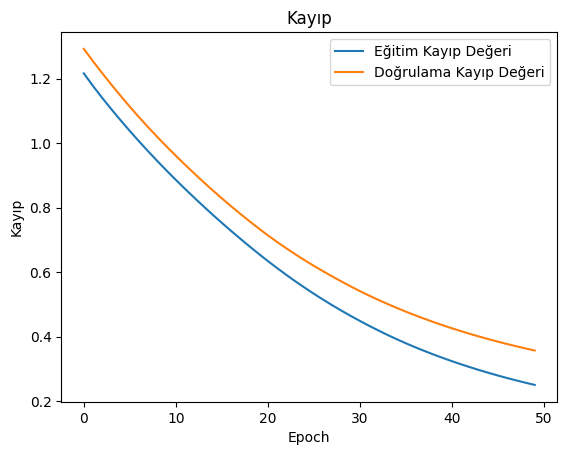

In [41]:
#Eğitim ve doğrulama kayıp değeri için veri görselleştirme
plt.plot(history.history['loss'], label="Eğitim Kayıp Değeri")
plt.plot(history.history['val_loss'], label="Doğrulama Kayıp Değeri")
plt.title("Kayıp")
plt.xlabel("Epoch")
plt.ylabel("Kayıp")
plt.legend()
plt.show()

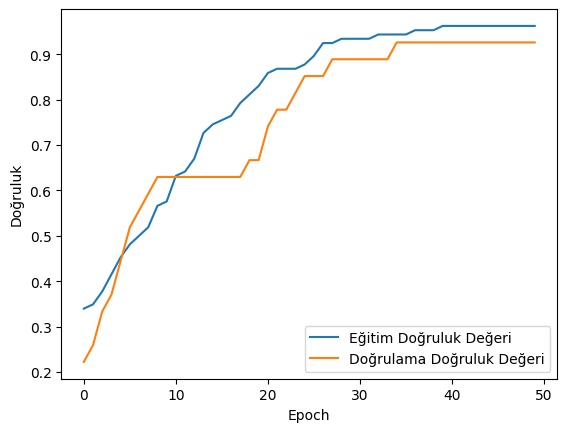

In [42]:
#Eğitim ve doğrulama doğruluğu için veri görselleştirme
plt.plot(history.history['accuracy'], label="Eğitim Doğruluk Değeri")
plt.plot(history.history['val_accuracy'], label="Doğrulama Doğruluk Değeri")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.show()

## **Farklı Output Çıkışları İle Tasarım**

In [49]:
# Model tasarımı ve eğitimi
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[8])

normal_layer_wide = tf.keras.layers.Normalization()
normal_layer_deep = tf.keras.layers.Normalization()

normal_layer_wide.adapt(X_train[:, :5])
normal_layer_deep.adapt(X_train[:, 5:])

normal_wide = normal_layer_wide(input_wide)
normal_deep = normal_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(64, activation="relu")(normal_deep)
hidden2 = tf.keras.layers.Dense(64, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([normal_wide, hidden2])
main_output = tf.keras.layers.Dense(wine.target_names.shape[0], activation='softmax', name="main_output")(concat)
aux_output = tf.keras.layers.Dense(wine.target_names.shape[0], activation='softmax', name="aux_output")(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[main_output, aux_output])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss={'main_output': 'sparse_categorical_crossentropy', 'aux_output': 'sparse_categorical_crossentropy'},
    metrics={'main_output': 'accuracy', 'aux_output': 'accuracy'}
)

X_train_wide = X_train[:, :5]
X_train_deep = X_train[:, 5:]

history = model.fit(
    [X_train_wide, X_train_deep],
    {'main_output': y_train, 'aux_output': y_train},
    epochs=50,
    batch_size=10,
    validation_split=0.2
)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - aux_output_accuracy: 0.2050 - loss: 2.6154 - main_output_accuracy: 0.1639 - val_aux_output_accuracy: 0.2593 - val_loss: 2.5580 - val_main_output_accuracy: 0.1111
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - aux_output_accuracy: 0.2050 - loss: 2.5513 - main_output_accuracy: 0.2031 - val_aux_output_accuracy: 0.2963 - val_loss: 2.5011 - val_main_output_accuracy: 0.1481
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - aux_output_accuracy: 0.2136 - loss: 2.4932 - main_output_accuracy: 0.2127 - val_aux_output_accuracy: 0.2963 - val_loss: 2.4460 - val_main_output_accuracy: 0.1481
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - aux_output_accuracy: 0.2516 - loss: 2.4376 - main_output_accuracy: 0.2607 - val_aux_output_accuracy: 0.4074 - val_loss: 2.3933 - val_main_output_accuracy: 0.1852
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - aux_output_accuracy: 0.2988 - loss: 2.3841 - main_output_accuracy: 0.2922 - val_aux_output

In [53]:
#Model değerlendirimi
test_loss, main_output_loss, aux_output_loss = model.evaluate(
    [X_test[:, :5], X_test[:, 5:]],
    {"main_output": y_test, "aux_output": y_test}
)
print(f"Test Loss: {test_loss}")
print(f"Main Output Loss: {main_output_loss}")
print(f"Aux Output Loss: {aux_output_loss}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - aux_output_accuracy: 0.9347 - loss: 0.6678 - main_output_accuracy: 0.9852 
Test Loss: 0.6744237542152405
Main Output Loss: 0.9333333373069763
Aux Output Loss: 0.9777777791023254


In [54]:
#Model tahmini
predictions = model.predict([X_test[:, :5], X_test[:, 5:]])
main_predictions = np.argmax(predictions[0], axis=1)
aux_predictions = np.argmax(predictions[1], axis=1)

print("Gerçek Değerler:", y_test)
print("Main Output Tahminleri:", main_predictions)
print("Aux Output Tahminleri:", aux_predictions)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Gerçek Değerler: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Main Output Tahminleri: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 0 2 0 1 1 1 2]
Aux Output Tahminleri: [0 0 2 0 1 0 1 2 1 2 1 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 0 2 0 1 1 1 2]


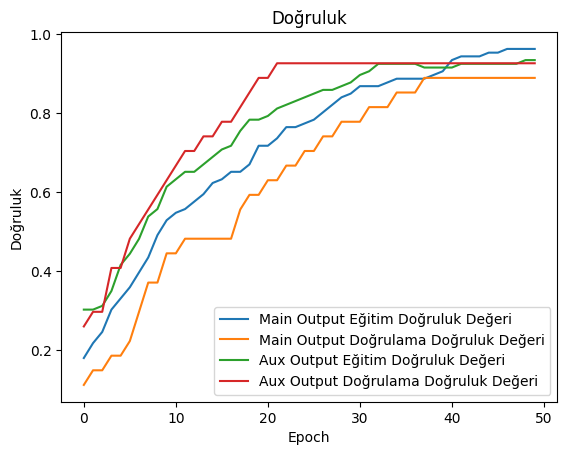

In [56]:
#Eğitim ve doğrulama doğruluğu için veri görselleştirme
plt.plot(history.history['main_output_accuracy'], label="Main Output Eğitim Doğruluk Değeri")
plt.plot(history.history['val_main_output_accuracy'], label="Main Output Doğrulama Doğruluk Değeri")
plt.plot(history.history['aux_output_accuracy'], label="Aux Output Eğitim Doğruluk Değeri")
plt.plot(history.history['val_aux_output_accuracy'], label="Aux Output Doğrulama Doğruluk Değeri")
plt.title("Doğruluk")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.show()